In [1]:
import matplotlib.pyplot as plt
import numpy as np

import fnmatch
import os
import pickle

os.chdir('/Users/qdo/SquirtleEEG8')
data = []
for file in sorted(os.listdir('.')):
    if fnmatch.fnmatch(file, '2022-02-*') and not fnmatch.fnmatch(file, '*_split'):
        print(file)
        with open(file,'rb') as f:
            data.append(pickle.load(f))

alldata = np.concatenate(data, axis=1)
print(alldata.shape)

2022-02-17 00:21:21.190084
2022-02-17 01:21:21.190096
2022-02-17 02:21:21.190086
2022-02-17 03:21:21.190087
2022-02-17 04:21:21.190096
2022-02-17 05:21:21.190083
2022-02-17 06:21:21.190085
2022-02-17 07:21:21.190085
2022-02-17 08:21:21.190095
2022-02-17 09:21:21.190092
2022-02-17 10:21:21.190093
2022-02-17 11:21:21.190093
2022-02-17 12:21:21.190092
2022-02-17 13:21:21.190092
2022-02-17 14:21:21.190091
2022-02-17 15:21:21.190093
2022-02-17 16:21:21.190100
2022-02-17 17:21:21.190099
2022-02-17 18:21:21.190100
2022-02-17 19:21:21.190095
2022-02-17 20:21:21.190095
2022-02-17 21:21:21.190089
2022-02-17 22:21:21.190092
2022-02-17 23:21:21.190101
(4, 86376024)


In [1]:
import matplotlib.pyplot as plt
import numpy as np

import fnmatch
import os
import pickle

#os.chdir('/Users/qdo/2022-03-17 17:59:02.791225')

os.chdir('/Users/qdo/2022-04-05 17:59:03.176627')

data = []
for file in sorted(os.listdir('.')):
    #if fnmatch.fnmatch(file, '2022-02-*') and not fnmatch.fnmatch(file, '*_split'):
        print(file)
        with open(file,'rb') as f:
            data.append(pickle.load(f))

alldata = data[2] #np.concatenate(data, axis=1)
print(alldata.shape)

2022-04-05 17:59:03.320893
2022-04-05 18:59:03.417089
2022-04-05 19:59:03.417088
2022-04-05 20:59:03.417082
2022-04-05 21:59:03.417094
2022-04-05 22:59:03.417078
2022-04-05 23:59:03.417404
2022-04-06 00:59:03.417096
2022-04-06 01:59:03.417086
2022-04-06 02:59:03.417272
2022-04-06 03:59:03.417088
2022-04-06 04:59:03.417092
2022-04-06 05:59:03.417091
2022-04-06 06:59:03.417094
2022-04-06 07:59:03.417092
2022-04-06 08:59:03.417093
2022-04-06 09:59:03.417313
2022-04-06 10:59:03.417092
2022-04-06 11:59:03.417094
2022-04-06 12:59:03.417090
2022-04-06 13:59:03.417408
2022-04-06 14:59:03.333090
2022-04-06 15:59:03.417096
2022-04-06 16:59:03.417095
(4, 3600001)


In [2]:
import yasa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2)

In [3]:
import mne
import numpy as np

/Users/qdo/opt/anaconda3/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package yasa is out of date. Your version is 0.6.0, the latest is 0.6.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


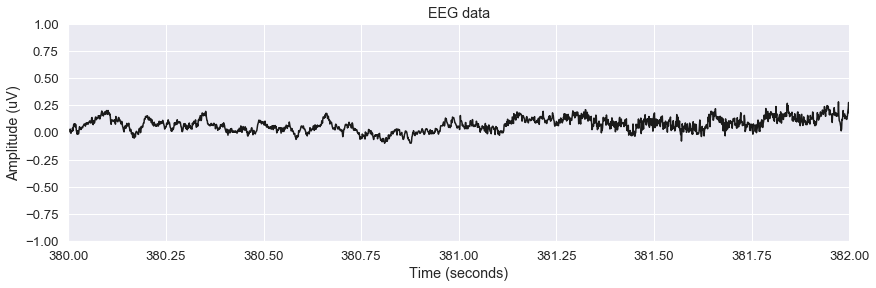

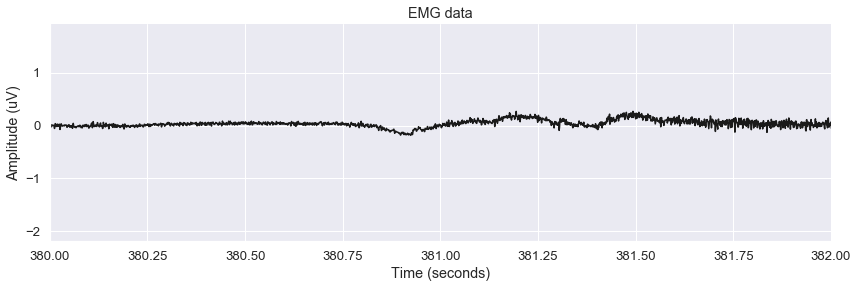

In [31]:
#data1 = data[6]
#data1=np.hstack((data[5],data[5])) #10 for active and 16 for sleep
#data1=np.hstack((data1,data[6])) #10 for active and 16 for sleep

#data1 = data[6]
#data1=np.hstack((data[5],data[5])) #10 for active and 16 for sleep
#data1=np.hstack((data1,data[6])) #10 for active and 16 for sleep

#alldata = np.concatenate(data[0:3], axis=1)
data1 = alldata
eeg = ((data1[0,:]-2)).reshape(-1) 

sf = 1000.
times = np.arange(eeg.size) / sf

# Plot the signal
fig, ax = plt.subplots(1, 1, figsize=(14, 4))
plt.plot(times, eeg, lw=1.5, color='k')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude (uV)')
plt.xlim([380, 382])
plt.ylim([-1, 1])

plt.title('EEG data')
sns.despine()

emg = ((data1[1,:]-2)).reshape(-1) 

sf = 1000.
times = np.arange(emg.size) / sf

# Plot the signal
fig, ax = plt.subplots(1, 1, figsize=(14, 4))
plt.plot(times, emg, lw=1.5, color='k')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude (uV)')
plt.xlim([380, 382])
plt.title('EMG data')
sns.despine()

In [5]:
# Create some dummy metadata
n_channels = 2
sampling_freq = 1000  # in Hertz
info = mne.create_info(n_channels, sfreq=sampling_freq)
print(info)

<Info | 7 non-empty values
 bads: []
 ch_names: 0, 1
 chs: 2 misc
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 nchan: 2
 projs: []
 sfreq: 1000.0 Hz
>


In [6]:
ch_names = ['EEG001','EMG001']
ch_types = ['eeg', 'emg']
info = mne.create_info(ch_names, ch_types=ch_types, sfreq=sampling_freq)
print(info)

<Info | 7 non-empty values
 bads: []
 ch_names: EEG001, EMG001
 chs: 1 EEG, 1 EMG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 nchan: 2
 projs: []
 sfreq: 1000.0 Hz
>


In [7]:
info['description'] = 'My custom dataset'
print(info)

<Info | 8 non-empty values
 bads: []
 ch_names: EEG001, EMG001
 chs: 1 EEG, 1 EMG
 custom_ref_applied: False
 description: My custom dataset
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 nchan: 2
 projs: []
 sfreq: 1000.0 Hz
>


In [8]:
rawdata= np.array([eeg,emg])
simulated_raw = mne.io.RawArray(rawdata, info)
#simulated_raw.plot(show_scrollbars=False, show_scalebars=False)

Creating RawArray with float64 data, n_channels=2, n_times=7200003
    Range : 0 ... 7200002 =      0.000 ...  7200.002 secs
Ready.


In [9]:
sls = yasa.SleepStaging(simulated_raw, eeg_name="EEG001", emg_name="EMG001")

In [10]:
# Getting the predicted sleep stages is now as easy as:
y_pred = sls.predict()
y_pred

/Users/qdo/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.24.2 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


array(['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W',
       'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W',
       'W', 'W', 'W', 'R', 'W', 'R', 'W', 'W', 'W', 'W', 'W', 'W', 'W',
       'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W',
       'W', 'W', 'W', 'W', 'R', 'R', 'R', 'R', 'R', 'R', 'W', 'R', 'R',
       'R', 'W', 'W', 'W', 'R', 'W', 'W', 'W', 'W', 'W', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'W', 'W', 'W', 'W',
       'W', 'N1', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W',
       'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W',
       'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W',
       'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W',
       'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W',
       'W', 'W', 'W', 'W', 'W', 'R', 'R', 'W', 'R', 'R', 'N1', 'N1', 'N2',
       'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W'

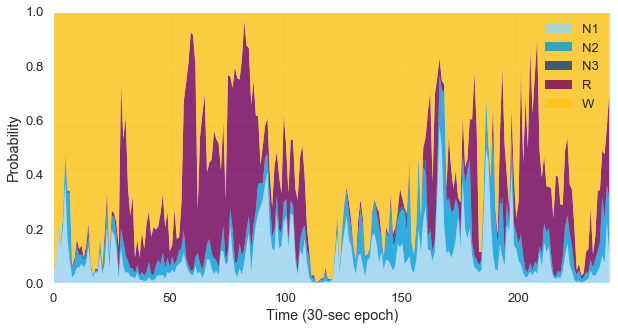

In [11]:
# Plot the predicted probabilities
sls.plot_predict_proba();

In [12]:
# From the probabilities, we can extract a confidence level (ranging from 0 to 1) for each epoch.
confidence = sls.predict_proba().max(1)
confidence

epoch
0      0.952429
1      0.925473
2      0.785389
3      0.853176
4      0.752390
         ...   
235    0.654484
236    0.509490
237    0.523382
238    0.420253
239    0.390477
Length: 240, dtype: float64

In [13]:
import pandas as pd
# Let's first create a dataframe with the predicted stages and confidence
df_pred = pd.DataFrame({'Stage': y_pred, 'Confidence': confidence})
df_pred.head(6)

# Now export to a CSV file
df_pred.to_csv("my_hypno.csv")

06-Apr-22 18:08:27 | WARNING | Hypnogram is SHORTER than data by 0.00 seconds. Padding hypnogram with last value to match data.size.


(7200003,) Unique values = [0 1 2 4]


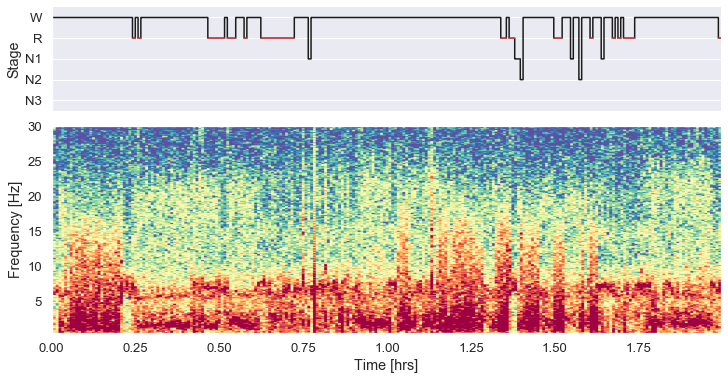

In [14]:
def sleepStage(n):
    if n == "N1":
        return 1
    elif n == "N2":
        return 2
    elif n == "N3":
        return 3
    elif n == "R":
        return 4
    else:
        return 0

hypno = list(map(sleepStage,y_pred))
hypno = yasa.hypno_upsample_to_data(hypno=hypno, sf_hypno=(1/30), data=eeg, sf_data=sf)
print(hypno.shape, 'Unique values =', np.unique(hypno))


fig = yasa.plot_spectrogram(eeg, sf, hypno=hypno, fmax=30, cmap='Spectral_r', trimperc=5)

In [15]:
art, zscores = yasa.art_detect(eeg, sf, window=5, hypno=hypno, include=(1, 2, 3, 4), 
                               method='covar', threshold=3, verbose='info')
art.shape, zscores.shape

06-Apr-22 18:08:37 | INFO | Number of unique values in hypno = 4
06-Apr-22 18:08:37 | INFO | Number of samples in data = 7200003
06-Apr-22 18:08:37 | INFO | Sampling frequency = 1000.00 Hz
06-Apr-22 18:08:37 | INFO | Data duration = 7200.00 seconds
06-Apr-22 18:08:37 | INFO | Trimmed standard deviation of CHAN000 = 58.3689 uV
06-Apr-22 18:08:37 | INFO | Peak-to-peak amplitude of CHAN000 = 4045.9381 uV
06-Apr-22 18:08:38 | WARNING | Must have at least 4 channels for method='covar'. Automatically switching to method='std'.
06-Apr-22 18:08:38 | INFO | Number of channels in data = 1
06-Apr-22 18:08:38 | INFO | Number of samples in data = 7200003
06-Apr-22 18:08:38 | INFO | Sampling frequency = 1000.00 Hz
06-Apr-22 18:08:38 | INFO | Data duration = 7200.00 seconds
06-Apr-22 18:08:38 | INFO | Number of epochs = 1440
06-Apr-22 18:08:38 | INFO | Artifact window = 5.00 seconds
06-Apr-22 18:08:38 | INFO | Method = std
06-Apr-22 18:08:38 | INFO | Threshold = 3.00 standard deviations
06-Apr-22 18:

((1440,), (1440, 1))

06-Apr-22 18:08:38 | WARNING | Hypnogram is SHORTER than data by 0.00 seconds. Padding hypnogram with last value to match data.size.


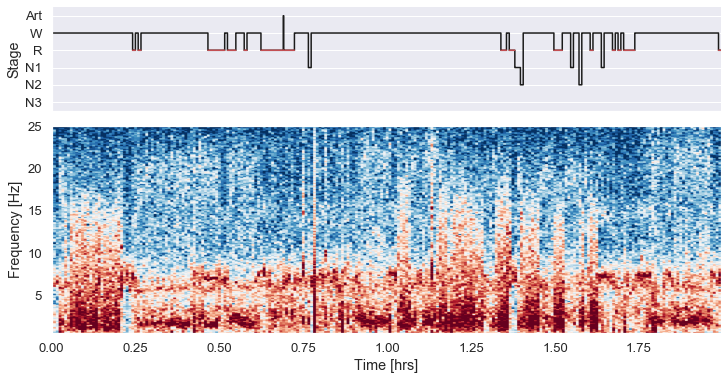

In [16]:
sf_art = 1 / 5

art_up = yasa.hypno_upsample_to_data(art, sf_art, eeg, sf)

# Add -1 to hypnogram where artifacts were detected
hypno_with_art = hypno.copy()
hypno_with_art[art_up] = -1

yasa.plot_spectrogram(eeg, sf, hypno_with_art);

In [17]:
#fig = yasa.plot_spectrogram(eeg, sf)

In [18]:
#art, zscores = yasa.art_detect(eeg, sf, window=5, method='covar', threshold=3)
#art.shape, zscores.shape

In [19]:
#print(art)
#print(f'{art.sum()} / {art.size} epochs rejected.')

In [20]:
# Apply the detection using yasa.spindles_detect
sp = yasa.spindles_detect(eeg, sf)

# Display the results using .summary()
sp.summary()

,Start,Peak,End,Duration,Amplitude,RMS,AbsPower,RelPower,Frequency,Oscillations,Symmetry,Channel,IdxChannel
0,17.801,18.028,18.380,0.579,226.520669,47.763166,3.018856,0.234617,13.415613,6.0,0.391379,CHAN000,0
1,19.343,19.661,19.844,0.501,329.035721,74.401024,3.752294,0.320610,13.456397,6.0,0.633466,CHAN000,0
2,44.619,44.907,46.232,1.613,323.849535,60.552109,3.272980,0.276970,13.896771,17.0,0.178439,CHAN000,0
3,134.057,134.475,134.617,0.560,347.674336,69.500183,3.683635,0.253904,13.062461,7.0,0.745098,CHAN000,0
4,658.211,658.618,658.853,0.642,148.566418,31.084294,3.042263,0.332768,13.304606,9.0,0.632970,CHAN000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,5228.952,5229.135,5229.585,0.633,238.870113,47.034105,2.872894,0.288340,14.493452,6.0,0.288644,CHAN000,0
88,5292.236,5292.415,5293.422,1.186,456.964072,73.945479,3.687011,0.247081,12.332552,14.0,0.150800,CHAN000,0
89,6175.491,6175.522,6176.019,0.528,208.096032,48.320663,3.261438,0.354853,12.829592,6.0,0.058601,CHAN000,0
90,6983.647,6983.847,6984.415,0.768,224.026018,41.419907,2.978358,0.225699,12.828430,9.0,0.260078,CHAN000,0


In [21]:
# Let's get a bool vector indicating for each sample
mask = sp.get_mask()
mask

array([0, 0, 0, ..., 0, 0, 0])

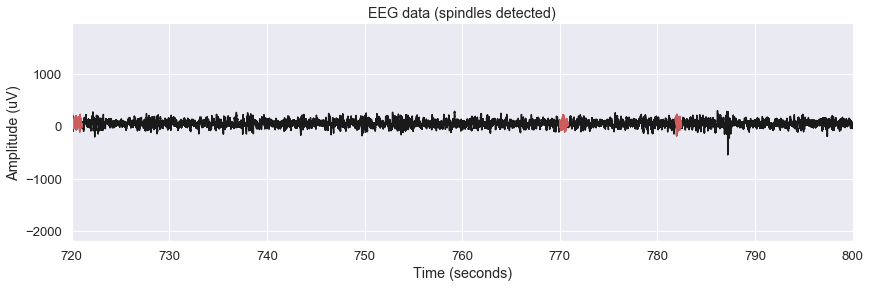

In [27]:
# Now let's plot
spindles_highlight = eeg * mask
spindles_highlight[spindles_highlight == 0] = np.nan

plt.figure(figsize=(14, 4))
plt.plot(times, eeg, 'k')
plt.plot(times, spindles_highlight, 'indianred')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude (uV)')
plt.xlim([720, 800])
plt.title('EEG data (spindles detected)')
sns.despine()
# plt.savefig('detection.png', dpi=300, bbox_inches='tight')